# Ford GoBike Analysis

### Table of Contents
<ul>
<li><a href="#introduction">Introduction</a></li>
<li><a href="#data">Data Gathering</a></li>
<li><a href="#biz">Business Understanding</a></li>
<li><a href="#understanding">Data Understanding</a></li>
<li><a href="#prep">Data Preparation</a></li>
<li><a href="#model">Model and Evaluation</a></li>
<li><a href="#conclusion">Conclusion</a></li>

</ul>

<a id='introduction'></a>

# 1. Introduction:About Ford GoBike
Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013. It services San Francisco, the East Bay and San Jose.

Similar to other bike share systems, Ford GoBike consists of a fleet of bikes that can be unlocked in one station and returned in any other network station. Thus, this is ideal for one-way trips. These bikes are available for use thorughout the year and riders have access to all bikes in the network.



<a id='data'></a>
# 2. Data Gathering
Ford GoBike is a publicly available dataset that will enable different folks with different skillsets to play around with. 

Data is downloaded from https://s3.amazonaws.com/fordgobike-data/index.html

For the current analysis, **2018** data is downloaded

Brief description about the data
Each trip is anonymized and includes:
1. Trip Duration (seconds)
2. Start Time and Date
3. End Time and Date
4. Start Station ID
5. Start Station Name
6. Start Station Latitude
7. Start Station Longitude
8. End Station ID
9. End Station Name
10. End Station Latitude
11. End Station Longitude
12. Bike ID
13. User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
14. Member Year of Birth
15. Member Gender

#### Data Extraction
Each Zip file downloaded has dat for each month in 2018

<a id='wrangle'></a>
### Data Wrangling

#### Importing all necesary packages

In [30]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sb
import glob
from IPython.display import Image
%matplotlib inline


#### Programatically importing 12 CSVs

In [2]:
# There are 12 CSVs present on the local folder. Programatically importing them

In [4]:
path =r'C:\Users\VVA3\OneDrive - Novartis Pharma AG\Udacity\Project 5'
allFiles = glob.glob(path + "/*.csv")

list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)

df = pd.concat(list_, axis = 0, ignore_index = True)

In [5]:
#Storing this dataframe into a CSV for further reads
df.to_csv('master_data_FordGoBike.csv', index=False)

#### Reading the imported data

In [31]:
# Reading the CSV
df = pd.read_csv('master_data_FordGoBike.csv')

In [32]:
df.shape

(1863721, 16)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [35]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


### Quality updates
1. Update start_time and end_time to date-time format
2. Convert the start_station_id and end_station_id int int64
3. Update member_birth_year as int64
4. Replace missing values for member_gender column as 'Other'

<a id='biz'></a>

# 3.Business Understanding

After reviewing the data, it is evident that the Ford GoBike is focused in the bay area with many people already subscribed to this service. There are others who would like to try this out for once before availing the service. 

In a crowded area like Bay Area, people often use such bike services to commute short distances within the city on a regular basis.

Hence, to understand the true use of such service, it is very important to evaluate some basic questions

Listing down the different questions that we would like to answer:
1. Who are Ford GoBike's customers? (w.r.t Deomgraphics)
2. When is the service often used? (weekdays vs. weekends)
3. What is the average ride across different cities? What is the average duration of each ride?
4. Which city has the highest usage of this service?
5. What are the characteristics of Customers vs. Subscribers?
6. Is the 'Bike Share For All program' successful?
7. Which are the famous starting and destination station?
8. Which are the famous routes?
9. What time of the day do users use this service?

<a id='understanding'></a>

# 4.Data Understanding
Based on the business questions listed above, and identified quality gaps below are some updates needed

1. Need to delete rows where member birth year = 0
2. Defining the day of the week
3. Identifying city names based on Latitude and Longitude information
4. Extracting time information form the start and end time columns
5. Extracting month information
6. Creating a time of the day variable


<a id='prep'></a>

# 5.Data Preparation

####  <>                   Upldating Quality

In [36]:
# creating a copy of the df
df_clean = df.copy()

#### <> Define
1. Update start_time and end_time to date-time format

#### <> Code

In [37]:
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])

#### <> Test

In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory usage: 227.5+ MB


In [39]:
# successfully converted to date-time format

#### <> Define
2. Convert the start_station_id and end_station_id int int64

#### <> Code

In [40]:
# first updating missing values with 0
df_clean['start_station_id'] = df_clean['start_station_id'].fillna(0).astype(int)
df_clean['end_station_id'] = df_clean['end_station_id'].fillna(0).astype(int)

In [41]:
df_clean['start_station_id'] = df_clean['start_station_id'].astype('int')
df_clean['end_station_id'] = df_clean['end_station_id'].astype('int')

#### <> Test

In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           int32
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             int32
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: datetime64[ns](2), float64(5), int32(2), int64(2), object(5)
memory usage: 213.3+ MB


In [43]:
# Successfully converted

#### <> Define
3. Update member_birth_year as int64

#### <> Code

In [44]:
df_clean['member_birth_year'] = df_clean['member_birth_year'].fillna(0).astype(int)
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype('int')

#### <> Test

In [45]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           int32
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             int32
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          int32
member_gender              object
bike_share_for_all_trip    object
dtypes: datetime64[ns](2), float64(4), int32(3), int64(2), object(5)
memory usage: 206.2+ MB


#### <> Define
4. Replace missing values for member_gender column as 'Other'

#### <> Code

In [46]:
# understanding the different values for the column member_gender
df_clean.groupby('member_gender').bike_id.count()

member_gender
Female     438188
Male      1288085
Other       27081
Name: bike_id, dtype: int64

In [47]:
df_clean['member_gender'] = df_clean['member_gender'].fillna('Other').astype(object)

#### <> Test

In [48]:
df_clean.groupby('member_gender').bike_id.count()

member_gender
Female     438188
Male      1288085
Other      137448
Name: bike_id, dtype: int64

In [49]:
# it is successfully completed

In [50]:
# Storing this clean dataset
df_clean.to_csv('clean_data_FordGoBike.csv', index=False)

### Creating all the needed features

In [51]:
# There is no age column. Hence creating an age column
df_clean['member_age'] = 2018-df_clean['member_birth_year']
df_clean['member_age'] = df_clean['member_age'].fillna(0).astype(int)

In [52]:
# number of records for missing year values
df_clean.query('member_birth_year ==0').bike_id.count()

110718

In [53]:
#removing all records where member_birth_year is 0
df_clean = df_clean.query('member_birth_year !=0')

In [54]:
#checking if the drop happened correctly
df_clean.shape

(1753003, 17)

In [55]:
# 1863721 - 110718 = 1753003. which is correct

In [56]:
# Definig day of the week
df_clean['start_weekday_n'] = df_clean['start_time'].dt.dayofweek

In [57]:
df_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_weekday_n
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,Male,No,32,2
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996,Male,No,22,2


In [58]:
# Creating columns to define the day of the week
df_clean['start_weekday'] = df_clean['start_weekday_n']
df_clean['weekday_end'] = df_clean['start_weekday_n']
df_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_weekday_n,start_weekday,weekday_end
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986,Male,No,32,2,2,2
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996,Male,No,22,2,2,2


In [59]:
# labelling to weekday and weekends
df_clean.weekday_end = df_clean.weekday_end.replace(0,'Weekday')
df_clean.weekday_end = df_clean.weekday_end.replace(1,'Weekday')
df_clean.weekday_end = df_clean.weekday_end.replace(2,'Weekday')
df_clean.weekday_end = df_clean.weekday_end.replace(3,'Weekday')
df_clean.weekday_end = df_clean.weekday_end.replace(4,'Weekday')
df_clean.weekday_end = df_clean.weekday_end.replace(5,'Weekend')
df_clean.weekday_end = df_clean.weekday_end.replace(6,'Weekend')

In [60]:
#Labelling the days of the week
df_clean.start_weekday = df_clean.start_weekday.replace(0,'Monday')
df_clean.start_weekday = df_clean.start_weekday.replace(1,'Tuesday')
df_clean.start_weekday = df_clean.start_weekday.replace(2,'Wednesday')
df_clean.start_weekday = df_clean.start_weekday.replace(3,'Thursday')
df_clean.start_weekday = df_clean.start_weekday.replace(4,'Friday')
df_clean.start_weekday = df_clean.start_weekday.replace(5,'Saturday')
df_clean.start_weekday = df_clean.start_weekday.replace(6,'Sunday')


In [61]:
df_clean.drop(['start_weekday_n'], axis=1, inplace=True)

In [62]:
# let us imagine each city to be in the sape of quadrilateral
# Manually extracting the latitude and longitude of North, East, South and West from Google Maps
# 5 cities in consideration are:
# 1. San Francisco
# 2. Redwood City
# 3. Mountain View
# 4. Palo Alto
# 5. San Jose

In [63]:
#SanFrancisco details
SanFran_north_lat = 37.810335
SanFran_east_lat = 37.728558
SanFran_south_lat = 37.708197
SanFran_west_lat = 37.779786
SanFran_north_long = -122.477062
SanFran_east_long =  -122.358060
SanFran_south_long = -122.448027
SanFran_west_long =  -122.358060

In [64]:
#Redwood City details
RedCity_north_lat = 37.552502 
RedCity_east_lat = 37.503973 
RedCity_south_lat = 37.447104
RedCity_west_lat = 37.469986 
RedCity_north_long = -122.243086
RedCity_east_long =  -122.167577
RedCity_south_long = -122.256179
RedCity_west_long =  -122.287742

In [65]:
#Mountain View details
Mount_north_lat = 37.438379
Mount_east_lat = 37.393620
Mount_south_lat = 37.356548
Mount_west_lat = 37.404572
Mount_north_long =  -122.097730
Mount_east_long =   -122.045240
Mount_south_long =  -122.066564
Mount_west_long =   -122.116979

#Palo Alto details
Palto_north_lat = 37.465442   
Palto_east_lat = 37.448250
Palto_south_lat = 37.389160
Palto_west_lat = 37.430551
Palto_north_long =   -122.115748
Palto_east_long =    -122.090172
Palto_south_long =   -122.126876
Palto_west_long =    -122.19028

#SanJose details
SanJose_north_lat = 37.468474 
SanJose_east_lat = 37.296141
SanJose_south_lat = 37.12578 
SanJose_west_lat = 37.294180
SanJose_north_long =   -121.945108
SanJose_east_long =     -121.715756
SanJose_south_long =   -121.776589
SanJose_west_long =     -122.028907

In [66]:
# Set a default value
df_clean['city'] = 'None'
df_clean['city'][(df_clean['start_station_latitude'] >= SanJose_south_lat) & 
             (df_clean['start_station_latitude'] <= SanJose_north_lat)] = 'San Jose'
df_clean['city'][(df_clean['start_station_latitude'] >= Palto_south_lat) & 
             (df_clean['start_station_latitude'] <= Palto_north_lat)] = 'Palo Alto'
df_clean['city'][(df_clean['start_station_latitude'] >= Mount_south_lat) & 
             (df_clean['start_station_latitude'] <= Mount_north_lat)] = 'Mountain View'
df_clean['city'][(df_clean['start_station_latitude'] >= RedCity_south_lat) & 
             (df_clean['start_station_latitude'] <= RedCity_north_lat)] = 'Redwood City'
df_clean['city'][(df_clean['start_station_latitude'] >= SanFran_south_lat) & 
             (df_clean['start_station_latitude'] <= SanFran_north_lat)] = 'San Francisco'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is try

In [68]:
# duration of the trip
df_clean['trip_duration'] = df_clean['end_time'] - df_clean['start_time']
df_clean.head(2)

# converting to minutes
df_clean['trip_duration'] = df_clean['trip_duration'].dt.total_seconds().div(60).astype(int)
df_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_weekday,weekday_end,city,trip_duration
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,2765,Subscriber,1986,Male,No,32,Wednesday,Weekday,San Francisco,1254
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,3039,Customer,1996,Male,No,22,Wednesday,Weekday,San Jose,1192


In [69]:
# renaming the month
df_clean['start_time_month']=df_clean['start_time'].dt.month.astype(int)
df_clean.head(2)

# Converting the month numbers to month names
df_clean.start_time_month = df_clean.start_time_month.replace(1,'Jan')
df_clean.start_time_month = df_clean.start_time_month.replace(2,'Feb')
df_clean.start_time_month = df_clean.start_time_month.replace(3,'Mar')
df_clean.start_time_month = df_clean.start_time_month.replace(4,'Apr')
df_clean.start_time_month = df_clean.start_time_month.replace(5,'May')
df_clean.start_time_month = df_clean.start_time_month.replace(6,'Jun')
df_clean.start_time_month = df_clean.start_time_month.replace(7,'Jul')
df_clean.start_time_month = df_clean.start_time_month.replace(8,'Aug')
df_clean.start_time_month = df_clean.start_time_month.replace(9,'Sep')
df_clean.start_time_month = df_clean.start_time_month.replace(10,'Oct')
df_clean.start_time_month = df_clean.start_time_month.replace(11,'Nov')
df_clean.start_time_month = df_clean.start_time_month.replace(12,'Dec')

df_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_weekday,weekday_end,city,trip_duration,start_time_month
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,Subscriber,1986,Male,No,32,Wednesday,Weekday,San Francisco,1254,Jan
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,Customer,1996,Male,No,22,Wednesday,Weekday,San Jose,1192,Jan


In [70]:
# concatinating the columns for identifying the routes
df_clean['route_con'] = df_clean['start_station_name'] + '-' + df_clean['end_station_name']

In [71]:
# identifying sessions within the day
df_clean = df_clean.assign(session=pd.cut(df_clean.start_time.dt.hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening']))

In [72]:
# Storing this clean dataset
df_clean.to_csv('clean_Feature_data_FordGoBike.csv', index=False)

<a id='model'></a>

# 6.Model and Evaluation

In [153]:
# Creating a new dataframe
df_viz = pd.read_csv('clean_Feature_data_FordGoBike.csv')

#### <> Question 1:  Who are Ford GoBike's customers? (w.r.t Deomgraphics)
**Details:**
1. age distribution
2. gender distribution

In [74]:
# learning more about the columns member_age and member_birth_year
df_viz['member_age'].min(), df_viz['member_age'].max()

(18, 137)

In [75]:
df_viz['member_birth_year'].min(), df_viz['member_birth_year'].max()

(1881, 2000)

In [76]:
df_viz.shape

(1753003, 24)

In [78]:
df_viz['member_birth_year'].min(), df_viz['member_birth_year'].max()

(1881, 2000)

In [79]:
# We will remove outliers later one after seeing the violin plots

Text(0, 0.5, 'Member Age')

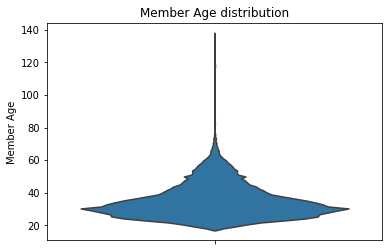

In [80]:
base_color = sb.color_palette()[0]
ax = sb.violinplot(data = df_viz, y = 'member_age', color = base_color, inner = None)
ax.set_title('Member Age distribution')
ax.set_ylabel('Member Age')

In [81]:
#There are definitely outliers in this dataset with age that is >100 years
# We will need to remove the outliers
print(df_viz.member_age.quantile(0.91), 
      df_viz.member_age.quantile(0.92),
      df_viz.member_age.quantile(0.93),
      df_viz.member_age.quantile(0.94),
      df_viz.member_age.quantile(0.95),
      df_viz.member_age.quantile(0.96),
      df_viz.member_age.quantile(0.97),
      df_viz.member_age.quantile(0.98),
      df_viz.member_age.quantile(0.99)
     )

51.0 52.0 53.0 54.0 56.0 57.0 59.0 61.0 65.0


In [82]:
# we can use the 98th percentile values as cut-off and take 60 years (between 97th and 98th percentile)

In [83]:
#counting the number of records that are greater than 99th percentile
df_viz.query('member_age > 60').bike_id.count()

36696

In [84]:
df_viz['member_age'].count()

1753003

In [85]:
# that is 44k records will be deleted out of nearly 1.7MM records
df_viz = df_viz.query('member_age <= 60')

In [86]:
# testing the deletion
df_viz.shape


(1716307, 24)

In [87]:
1753003 - 36696

1716307

In [88]:
# the drop is accurate

In [89]:
# replotting the age distribution

Text(0, 0.5, 'Member Age')

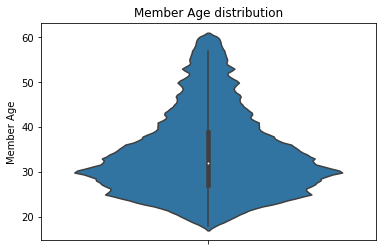

In [90]:
base_color = sb.color_palette()[0]
ax = sb.violinplot(data = df_viz, y = 'member_age', color = base_color)
ax.set_title('Member Age distribution')
ax.set_ylabel('Member Age')

In [91]:
# the plot looks much cleaner now

In [92]:
# Plotting the bar chart for member distribution

Text(0.5, 0, 'Gender')

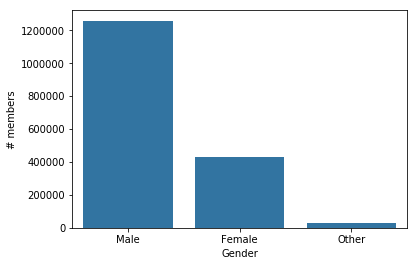

In [93]:
base_color = sb.color_palette()[0]
ax = sb.countplot(data = df_viz, x = 'member_gender', color = base_color, order=[ "Male", "Female", "Other"])
ax.set_ylabel('# members')
ax.set_xlabel('Gender')

In [94]:
df_viz.groupby('member_gender').bike_id.count()

member_gender
Female     431865
Male      1257943
Other       26499
Name: bike_id, dtype: int64

In [95]:
# Also, looking at age distribution across different genders

Text(0, 0.5, 'Gender')

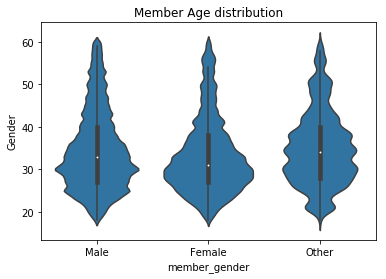

In [96]:
base_color = sb.color_palette()[0]
ax = sb.violinplot(data = df_viz, x = 'member_gender' , y = 'member_age', color = base_color)
ax.set_title('Member Age distribution')
ax.set_ylabel('Member Age')
ax.set_ylabel('Gender')

#### Some observations:
1. The age of population who use Ford GoBike service is spread between (22/23 - 40 years)
2. The gender distribution is skewed towards Male population
3. The age distribution of Male is bi-modal: ~25 and 30 years of age
4. Whareas, 50% Female population is just <30 years of age

#### <> Question 2:  When is the service often used? (weekdays vs. weekends)
**Details:**
1. weekdays vs. weekends

In [97]:
# classifying the days as weekday and weekends

In [98]:
df_viz.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,member_age,start_weekday,weekday_end,city,trip_duration,start_time_month,route_con,session
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,Male,No,32,Wednesday,Weekday,San Francisco,1254,Jan,Mission Dolores Park-Webster St at O'Farrell St,Evening
1,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,Male,No,22,Wednesday,Weekday,San Jose,1192,Jan,Jackson St at 5th St-5th St at Virginia St,Afternoon


In [99]:
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1716307 entries, 0 to 1753002
Data columns (total 24 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           int64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             int64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          int64
member_gender              object
bike_share_for_all_trip    object
member_age                 int64
start_weekday              object
weekday_end                object
city                       object
trip_duration              int64
start_time_month           object
route_con                  object
session                    object
dtypes: float64(4), int64(7), object(13)
memory usage: 327.4+ MB


In [100]:
df_viz.groupby('weekday_end').bike_id.count()

weekday_end
Weekday    1431258
Weekend     285049
Name: bike_id, dtype: int64

In [101]:
df_viz.groupby('start_weekday').bike_id.count()

start_weekday
Friday       268686
Monday       274839
Saturday     151848
Sunday       133201
Thursday     293290
Tuesday      298392
Wednesday    296051
Name: bike_id, dtype: int64

Text(0.5, 0, 'Day of the week')

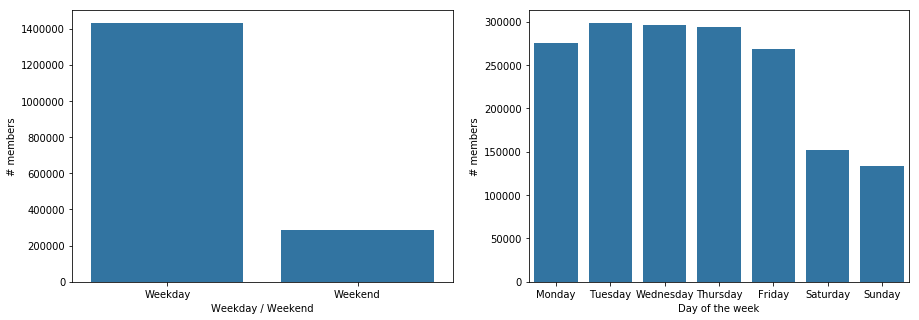

In [102]:
# plotting the distribution
plt.figure(figsize = [15, 5]) # larger figure size for subplots

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
base_color = sb.color_palette()[0]
bx = sb.countplot(data = df_viz, x = 'weekday_end', color = base_color, order=[ "Weekday", "Weekend"])
bx.set_ylabel('# members')
bx.set_xlabel('Weekday / Weekend')

# example of somewhat too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
base_color = sb.color_palette()[0]
ax = sb.countplot(data = df_viz, x = 'start_weekday', color = base_color, order=[ "Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
ax.set_ylabel('# members')
ax.set_xlabel('Day of the week')

#### Some Observations:
1. The service is used more during weekdays than weekends
2. Tue, Wed, Thu see the peak usage of this service

#### <> Question 3: .What is the average number of ride across different cities? What is the average duration of each ride?
**Details:**
1.  no of rides and duration of rides with color / shape indicating 5 different cities

In [103]:
# I am getting too many memory errors, hence creating a dataframe often and making necessary quality updates

In [104]:
#df_viz.to_csv('viz_city.csv', index=False)

In [105]:
#df_viz = pd.read_csv('viz_city.csv')

In [106]:
#Extracting city information
df_viz.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,member_age,start_weekday,weekday_end,city,trip_duration,start_time_month,route_con,session
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,Male,No,32,Wednesday,Weekday,San Francisco,1254,Jan,Mission Dolores Park-Webster St at O'Farrell St,Evening
1,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,Male,No,22,Wednesday,Weekday,San Jose,1192,Jan,Jackson St at 5th St-5th St at Virginia St,Afternoon


In [107]:
df_viz.groupby('city').bike_id.count()

city
Mountain View      11314
None              260126
Palo Alto              3
San Francisco    1362895
San Jose           81969
Name: bike_id, dtype: int64

In [108]:
# Calculating the duration of the trip
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1716307 entries, 0 to 1753002
Data columns (total 24 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           int64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             int64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          int64
member_gender              object
bike_share_for_all_trip    object
member_age                 int64
start_weekday              object
weekday_end                object
city                       object
trip_duration              int64
start_time_month           object
route_con                  object
session                    object
dtypes: float64(4), int64(7), object(13)
memory usage: 327.4+ MB


In [12]:
# Since, we reloaded the data, we will need to convert the time to timestamp format
#df_viz['start_time'] = pd.to_datetime(df_viz['start_time'])
#df_viz['end_time'] = pd.to_datetime(df_viz['end_time'])

In [109]:
# creating a new dataframe with pivot for achieving the scatterplot
g = df_viz.groupby(['bike_id','city'])['trip_duration'].mean().reset_index()
g

,bike_id,city,trip_duration
0,11,None,10.678571
1,11,San Francisco,10.113333
2,12,None,9.976636
3,12,San Francisco,10.000000
4,13,None,10.033755
5,13,San Francisco,10.252525
6,14,None,11.540000
7,14,San Francisco,9.450000
8,15,None,8.640000
9,15,San Francisco,10.088235


In [110]:
j = df_viz.groupby(['bike_id','city']).size().to_frame('no. of trips')
j

no. of trips
bike_id city                       
11      None                    224
        San Francisco           150
12      None                    214
        San Francisco            83
13      None                    237
        San Francisco            99
14      None                     50
        San Francisco            20
15      None                    175
        San Francisco            68
17      San Francisco           800
18      None                    245
        San Francisco            53
20      San Francisco           464
21      None                     48
        San Francisco            38
22      None                    112
        San Francisco            72
23      San Francisco           524
24      San Francisco           675
        San Jose                 45
25      San Francisco            96
26      None                    277
        San Francisco            97
27      San Francisco           470
29      San Francisco           222
30      None                    282
        San Francisco            97
31      None                    239
        San Francisco            58
...                             ...
5550    San Francisco            53
5551    San Francisco             4
5552    San Francisco            36
5554    San Francisco            44
5555    San Francisco            49
5556    San Francisco            31
5557    San Francisco            28
5558    San Francisco            40
5559    San Francisco            14
5560    San Francisco            34
5561    San Francisco            47
5562    San Francisco             2
5563    None                     16
        San Francisco             8
5564    San Francisco            29
5565    San Francisco            27
5566    San Francisco            52
5567    San Francisco            40
5568    San Francisco            54
5569    San Francisco            46
5570    San Francisco            30
5571    San Francisco             4
5572    San Francisco            23
5573    San Francisco            29
5574    San Francisco             7
5575    San Francisco            33
5576    San Francisco            10
5577    San Francisco            44
6147    San Francisco            20
6234    San Francisco            15

[7716 rows x 1 columns]

In [111]:
k = pd.merge(g, j, how='left', on=['bike_id', 'city'])
k

,bike_id,city,trip_duration,no. of trips
0,11,None,10.678571,224
1,11,San Francisco,10.113333,150
2,12,None,9.976636,214
3,12,San Francisco,10.000000,83
4,13,None,10.033755,237
5,13,San Francisco,10.252525,99
6,14,None,11.540000,50
7,14,San Francisco,9.450000,20
8,15,None,8.640000,175
9,15,San Francisco,10.088235,68


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


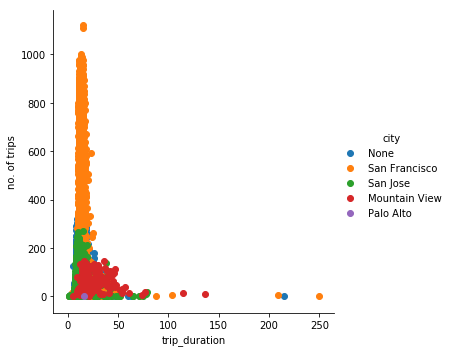

In [112]:
# Scatter plot to understand the distribution of # trips vs. trip duration
ax = sb.FacetGrid(data = k, hue = 'city', size = 5)
ax.map(plt.scatter, 'trip_duration', 'no. of trips')
ax.add_legend()

#### Some Observations
1. A majority of the trips range between 0 and 30 min


#### <> Question 4: What are the characteristics of Customers vs. Subscribers?
**Details:**
1. Characteristics can be defined as age, avg trips, avg duration

In [113]:
# Subscribers vs. Customers : Age
df_viz.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,member_age,start_weekday,weekday_end,city,trip_duration,start_time_month,route_con,session
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,Male,No,32,Wednesday,Weekday,San Francisco,1254,Jan,Mission Dolores Park-Webster St at O'Farrell St,Evening
1,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,Male,No,22,Wednesday,Weekday,San Jose,1192,Jan,Jackson St at 5th St-5th St at Virginia St,Afternoon


In [114]:
# For plotting the avg time and trips, we will need to create some temporary dataframes

In [115]:
# dataframe for avg trip duration
g = df_viz.groupby(['user_type'])['trip_duration'].mean().reset_index()
g

,user_type,trip_duration
0,Customer,26.309685
1,Subscriber,10.635402


In [116]:
# dataframe for count of trips
j = df_viz.groupby(['user_type']).size().to_frame('no. of trips')
j

,no. of trips
user_type,
Customer,199887
Subscriber,1516420


In [117]:
# merging the dataframes
k = pd.merge(g, j, how='left', on=['user_type'])
k

,user_type,trip_duration,no. of trips
0,Customer,26.309685,199887
1,Subscriber,10.635402,1516420


Text(0, 0.5, 'Trip Duration')

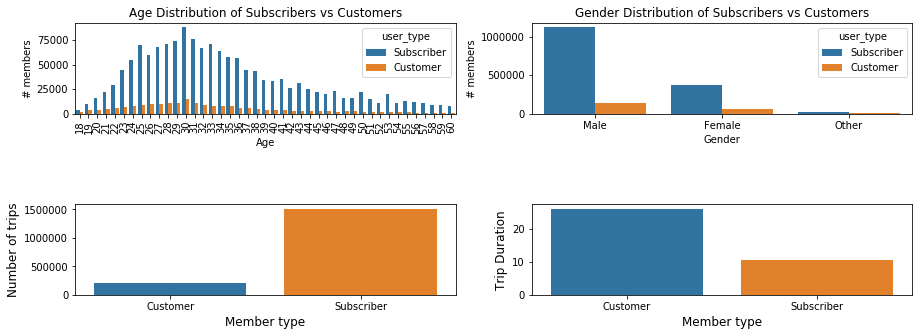

In [118]:
# plotting the distribution
plt.figure(figsize = [15, 5]) # larger figure size for subplots


#first subplot
plt.subplot(2, 2, 1) # 1 row, 2 cols, subplot 1
plt.subplots_adjust(hspace=1)
base_color = sb.color_palette()[0]
p = sb.countplot(data = df_viz, x = 'member_age', hue = 'user_type')
for item in p.get_xticklabels():
    item.set_rotation(90)
p.set_title('Age Distribution of Subscribers vs Customers')
p.set_ylabel('# members')
p.set_xlabel('Age')


#second subplot
plt.subplot(2, 2, 2) # 1 row, 2 cols, subplot 2
plt.subplots_adjust(hspace=1)
base_color = sb.color_palette()[0]
p = sb.countplot(data = df_viz, x = 'member_gender', hue = 'user_type')
p.set_title('Gender Distribution of Subscribers vs Customers')
p.set_ylabel('# members')
p.set_xlabel('Gender')

#third subplot
plt.subplot(2, 2, 3) # 1 row, 2 cols, subplot 3
plt.subplots_adjust(hspace=1)
base_color = sb.color_palette()[0]
ax = sb.barplot(x = 'user_type', y='no. of trips',data=k)
ax.set_xlabel("Member type", fontsize=12)
ax.set_ylabel("Number of trips", fontsize=12)

#fourth subplot
plt.subplot(2, 2, 4) # 1 row, 2 cols, subplot 3
plt.subplots_adjust(hspace=1)
base_color = sb.color_palette()[0]
ax = sb.barplot(x = 'user_type', y='trip_duration',data=k)
ax.set_xlabel("Member type", fontsize=12)
ax.set_ylabel("Trip Duration", fontsize=12)



In [119]:
df_viz.groupby(['member_gender','user_type']).bike_id.count()

member_gender  user_type 
Female         Customer        63415
               Subscriber     368450
Male           Customer       132471
               Subscriber    1125472
Other          Customer         4001
               Subscriber      22498
Name: bike_id, dtype: int64

#### Some Observations
1. Subscribers are heavily skewed between 25 and 35 years of age
2. Males use this service more than Females
3. Males subscribe to the 'bike_share_for_all_trip' service too more than females
4. Customers tke more number of trips, but they rent it out for a shorter duration each trip
5. Whereas, Subscribers use the service less, but, rent it out for a much longer duration each trip

#### <> Question 6: Is the 'Bike Share For All program' successful?
**Details:**
1. number of trips with this program against the month of strip start

In [120]:
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1716307 entries, 0 to 1753002
Data columns (total 24 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           int64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             int64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          int64
member_gender              object
bike_share_for_all_trip    object
member_age                 int64
start_weekday              object
weekday_end                object
city                       object
trip_duration              int64
start_time_month           object
route_con                  object
session                    object
dtypes: float64(4), int64(7), object(13)
memory usage: 327.4+ MB


Text(0.5, 0, '2018')

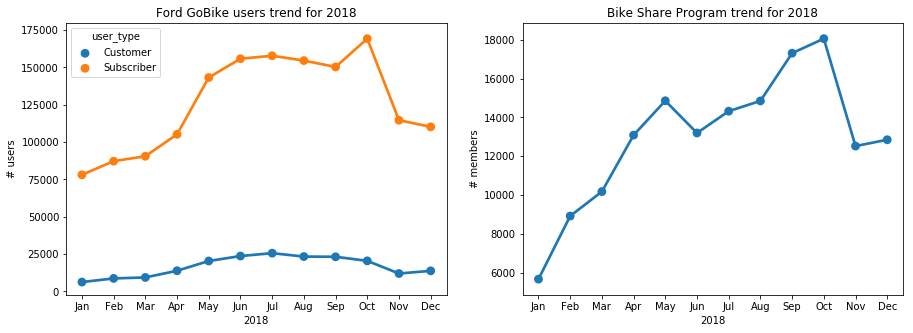

In [121]:
# Creating 2 sub-plots to compare the overall growth of the Ford GoBike service and bike_share_for_all_trip program

# plotting the distribution
plt.figure(figsize = [15, 5]) # larger figure size for subplots

#first subplot
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
plt.subplots_adjust(hspace=1)
base_color = sb.color_palette()[0]
count = df_viz.groupby(["start_time_month", "user_type"]).size().reset_index()
p = sb.pointplot(x='start_time_month', y=0, hue='user_type', data=count, order=[ "Jan", "Feb", "Mar","Apr","May"
                                                                          ,"Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
p.set_title('Ford GoBike users trend for 2018')
p.set_ylabel('# users')
p.set_xlabel('2018')


#second subplot
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
plt.subplots_adjust(hspace=1)
base_color = sb.color_palette()[0]
count_prg = df_viz.query('bike_share_for_all_trip == "Yes"')
count_prg = count_prg.groupby('start_time_month').bike_id.count().reset_index()
p = sb.pointplot(x='start_time_month', y='bike_id', data=count_prg, order=[ "Jan", "Feb", "Mar","Apr","May"
                                                                          ,"Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
p.set_title('Bike Share Program trend for 2018')
p.set_ylabel('# members')
p.set_xlabel('2018')

#### Some Observations:
1. The "Bike Share" program in general is growing through the year
2. It picks up gradually in the beginning of 2018 an then peaks in Oct'18 with nearly 18k members
3. Ford GoBike service is also growing overall, the subscirber base increased from 75k in Jan through ~175k in Oct
4. The holiday season has an impact on the service and we see a dip in Nov and Dec
5. The service is also catching up with one time users

#### <> Question 6: Which are the famous starting and destination station?
**Details:**
1. Identify top 10 source sites
2. compare the volume of rides across top 10 sites

In [122]:
df_viz.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,member_age,start_weekday,weekday_end,city,trip_duration,start_time_month,route_con,session
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,Male,No,32,Wednesday,Weekday,San Francisco,1254,Jan,Mission Dolores Park-Webster St at O'Farrell St,Evening
1,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,Male,No,22,Wednesday,Weekday,San Jose,1192,Jan,Jackson St at 5th St-5th St at Virginia St,Afternoon


In [123]:
#grouping them by station id
df_station = df_viz.groupby('start_station_id').bike_id.count().reset_index()
df_station

,start_station_id,bike_id
0,0,11395
1,3,28156
2,4,5087
3,5,22602
4,6,27510
5,7,8026
6,8,9128
7,9,8945
8,10,6632
9,11,8481


In [124]:
#sorting the dataframe in descending order
df_station = df_station.sort_values(by=['bike_id'], ascending = False)
df_station = df_station.reset_index(drop=True)

In [125]:
print(df_station.bike_id.quantile(0.8), 
      df_station.bike_id.quantile(0.91), 
      df_station.bike_id.quantile(0.92),
      df_station.bike_id.quantile(0.93),
      df_station.bike_id.quantile(0.94),
      df_station.bike_id.quantile(0.95),
      df_station.bike_id.quantile(0.96),
      df_station.bike_id.quantile(0.97),
      df_station.bike_id.quantile(0.98),
      df_station.bike_id.quantile(0.99)      
     )

7967.4000000000015 11198.290000000008 11803.640000000014 12480.270000000015 14352.299999999996 16058.199999999993 17225.6 22786.72999999998 27755.479999999996 32088.05


In [126]:
#calculating the cumulative percentage
df_station["cumpercentage"] = df_station["bike_id"].cumsum()/df_station["bike_id"].sum()*100

In [127]:
df_station.head(10)

,start_station_id,bike_id,cumpercentage
0,67,35296,2.056509
1,58,32907,3.973823
2,30,32768,5.883038
3,15,32195,7.758868
4,81,31850,9.614597
5,21,29686,11.344241
6,3,28156,12.984740
7,6,27510,14.587600
8,16,26060,16.105976
9,22,25241,17.576634


In [128]:
# there is a need to create multiple dataframes
# 1. top 10
# 2. 11-50
# 3. 51-100
# 4. 101-200
# 5. Rest
# This way we can see the progression clearly

In [129]:
# First dataframe (first 10)
df_station_1 = df_station[:10]
df_station_1

,start_station_id,bike_id,cumpercentage
0,67,35296,2.056509
1,58,32907,3.973823
2,30,32768,5.883038
3,15,32195,7.758868
4,81,31850,9.614597
5,21,29686,11.344241
6,3,28156,12.984740
7,6,27510,14.587600
8,16,26060,16.105976
9,22,25241,17.576634


In [130]:
# writing a function to do this

def splitting(z,x,y):

    df_station_z = df_station[x:y]
    df_station_z = pd.DataFrame({'start_station_id': [str(x+1)+"-"+str(y+1)],
                                 'bike_id': df_station_z['bike_id'].sum(),
                                 'cumpercentage':df_station_z['cumpercentage'].max()})
    
    return df_station_z
    
  

In [131]:
# calling the function 
df_station_2 = splitting(2,10,19)
df_station_2

,start_station_id,bike_id,cumpercentage
0,11-20,162215,27.028032


In [132]:
df_station_3 = splitting(3,20,29)
df_station_3

,start_station_id,bike_id,cumpercentage
0,21-30,112650,34.442556


In [133]:
df_station_4 = splitting(4,30,49)
df_station_4

,start_station_id,bike_id,cumpercentage
0,31-50,199000,46.701144


In [134]:
df_station_5 = splitting(5,50,75)
df_station_5

,start_station_id,bike_id,cumpercentage
0,51-76,207869,59.347308


In [135]:
df_station_6 = splitting(6,76,100)
df_station_6

,start_station_id,bike_id,cumpercentage
0,77-101,161935,69.227592


In [136]:
df_station_7 = splitting(7,101,199)
df_station_7

,start_station_id,bike_id,cumpercentage
0,102-200,384895,92.002655


In [137]:
df_station_8 = splitting(8,200,331)
df_station_8

,start_station_id,bike_id,cumpercentage
0,201-332,134895,99.999534


In [138]:
# Appending all dataframes
df_station_final = pd.concat([df_station_1, df_station_2,df_station_3, df_station_4, df_station_5, df_station_6, 
                             df_station_7, df_station_8])
df_station_final

,start_station_id,bike_id,cumpercentage
0,67,35296,2.056509
1,58,32907,3.973823
2,30,32768,5.883038
3,15,32195,7.758868
4,81,31850,9.614597
5,21,29686,11.344241
6,3,28156,12.984740
7,6,27510,14.587600
8,16,26060,16.105976
9,22,25241,17.576634


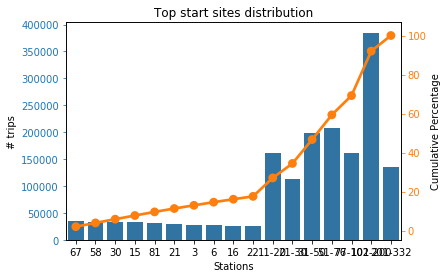

In [139]:
# plotting the pareto chart
base_color = sb.color_palette()[0]
base_color_2 = sb.color_palette()[1]
ax = sb.barplot(x = 'start_station_id', y='bike_id',data=df_station_final, color = base_color)
ax2 = ax.twinx()
ax2 = sb.pointplot(x = 'start_station_id', y='cumpercentage',data=df_station_final, color = base_color_2)

ax.tick_params(axis="y", colors=base_color)
ax2.tick_params(axis="y", colors=base_color_2)

ax.set_title('Top start sites distribution')
ax.set_ylabel('# trips')
ax2.set_ylabel('Cumulative Percentage')
ax.set_xlabel('Stations')


plt.show()


#### Some Observations:
1. The top 10 sites contribute to ~20% of the total bike rides
2. The remaining 321 sites contribute to 80% of the rides

#### <> Question 7: Which are the famous routes?
**Details:**
1. Identify top 10 start-end routes
2. Heatmap of this combination

In [140]:
df_viz.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,member_age,start_weekday,weekday_end,city,trip_duration,start_time_month,route_con,session
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,Male,No,32,Wednesday,Weekday,San Francisco,1254,Jan,Mission Dolores Park-Webster St at O'Farrell St,Evening
1,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,Male,No,22,Wednesday,Weekday,San Jose,1192,Jan,Jackson St at 5th St-5th St at Virginia St,Afternoon


In [141]:
# Summarizing the dataframe
df_route = df_viz.groupby('route_con').bike_id.count().reset_index()
df_route

,route_con,bike_id
0,10th Ave at E 15th St-10th Ave at E 15th St,13
1,10th Ave at E 15th St-10th St at Fallon St,84
2,10th Ave at E 15th St-12th St at 4th Ave,4
3,10th Ave at E 15th St-12th St at 6th Ave,5
4,10th Ave at E 15th St-13th St at Franklin St,49
5,10th Ave at E 15th St-19th Street BART Station,5
6,10th Ave at E 15th St-21st Ave at Internationa...,13
7,10th Ave at E 15th St-23rd Ave at Foothill Blvd,5
8,10th Ave at E 15th St-27th St at MLK Jr Way,1
9,10th Ave at E 15th St-2nd Ave at E 18th St,15


In [142]:
#sorting the dataframe
df_route = df_route.sort_values(by=['bike_id'], ascending = False)
df_route = df_route.reset_index(drop=True)
df_route.head(10)

,route_con,bike_id
0,San Francisco Ferry Building (Harry Bridges Pl...,5925
1,The Embarcadero at Sansome St-Steuart St at Ma...,4570
2,Berry St at 4th St-San Francisco Ferry Buildin...,4243
3,Grand Ave at Perkins St-19th Street BART Station,3811
4,19th Street BART Station-Grand Ave at Perkins St,3664
5,The Embarcadero at Sansome St-San Francisco Fe...,3175
6,San Francisco Ferry Building (Harry Bridges Pl...,3028
7,Steuart St at Market St-The Embarcadero at San...,2986
8,Bay Pl at Vernon St-19th Street BART Station,2970
9,Townsend St at 7th St-San Francisco Caltrain S...,2824


In [143]:
#Splitting the start and end stations
df_route['start_station'], df_route['end_station'] = df_route['route_con'].str.split('-', 1).str
df_route.head(10)

,route_con,bike_id,start_station,end_station
0,San Francisco Ferry Building (Harry Bridges Pl...,5925,San Francisco Ferry Building (Harry Bridges Pl...,The Embarcadero at Sansome St
1,The Embarcadero at Sansome St-Steuart St at Ma...,4570,The Embarcadero at Sansome St,Steuart St at Market St
2,Berry St at 4th St-San Francisco Ferry Buildin...,4243,Berry St at 4th St,San Francisco Ferry Building (Harry Bridges Pl...
3,Grand Ave at Perkins St-19th Street BART Station,3811,Grand Ave at Perkins St,19th Street BART Station
4,19th Street BART Station-Grand Ave at Perkins St,3664,19th Street BART Station,Grand Ave at Perkins St
5,The Embarcadero at Sansome St-San Francisco Fe...,3175,The Embarcadero at Sansome St,San Francisco Ferry Building (Harry Bridges Pl...
6,San Francisco Ferry Building (Harry Bridges Pl...,3028,San Francisco Ferry Building (Harry Bridges Pl...,Berry St at 4th St
7,Steuart St at Market St-The Embarcadero at San...,2986,Steuart St at Market St,The Embarcadero at Sansome St
8,Bay Pl at Vernon St-19th Street BART Station,2970,Bay Pl at Vernon St,19th Street BART Station
9,Townsend St at 7th St-San Francisco Caltrain S...,2824,Townsend St at 7th St,San Francisco Caltrain Station 2 (Townsend St...


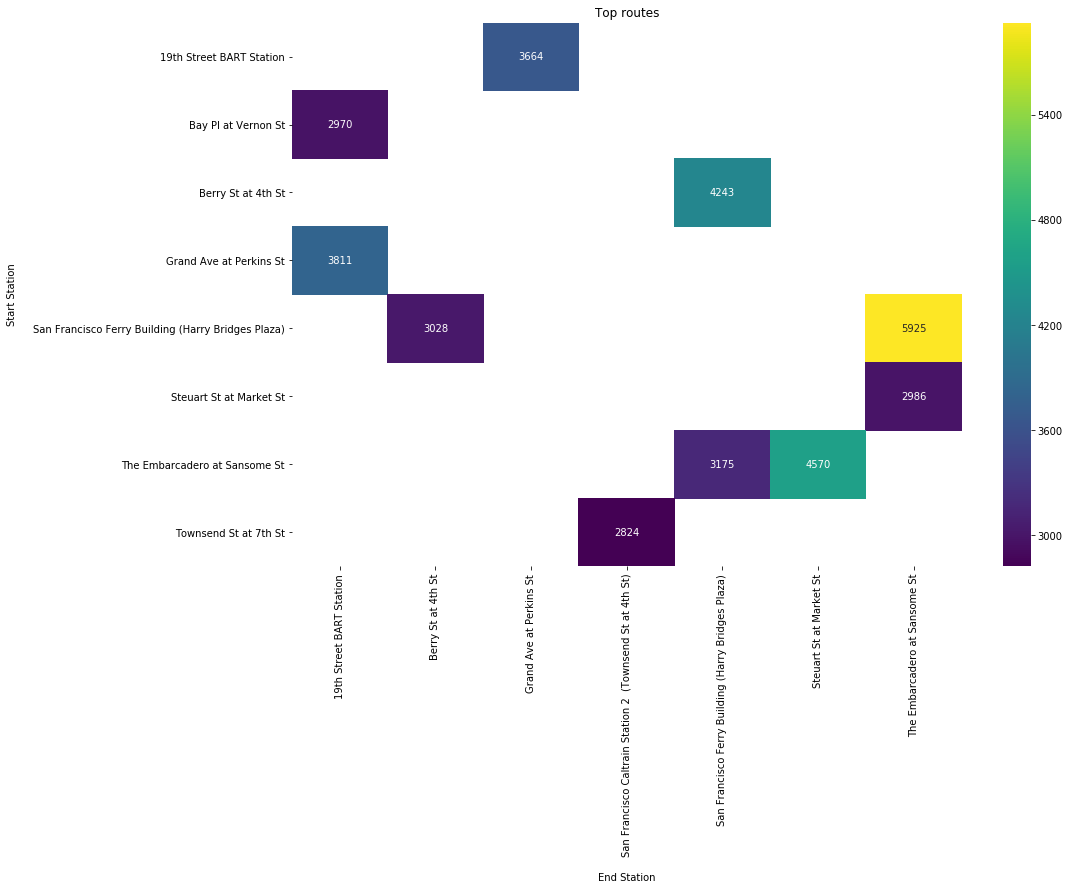

In [144]:
# plotting the heatmap
plt.figure(figsize=(15,10))
df_route_new = df_route[:10]
result = df_route_new.pivot(index='start_station', columns='end_station', values='bike_id')
sb.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.title("Top routes", y=1.015)
plt.xlabel('End Station', labelpad=16)
plt.ylabel('Start Station', labelpad=16)
plt.yticks(rotation=360)
plt.show()

#### Some Observations:
1. The most common route taken by the users is between Harry Bridges Plaza and The Embarcadero at Sansome St
2. Harry Bridge Plaza is a hangout place in SF where one can find may folks throughout the day
3. The Embarcadero center has an office space along with restaurants and shopping complex
4. These 2 places are ~1 mile away

#### <> Question 8: What time of the day do users use this service?
**Details:**
1. rides taken across morning, afternoon, evening and night


In [145]:
df_viz.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,member_age,start_weekday,weekday_end,city,trip_duration,start_time_month,route_con,session
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,Male,No,32,Wednesday,Weekday,San Francisco,1254,Jan,Mission Dolores Park-Webster St at O'Farrell St,Evening
1,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,Male,No,22,Wednesday,Weekday,San Jose,1192,Jan,Jackson St at 5th St-5th St at Virginia St,Afternoon


In [146]:
df_viz.groupby('session').bike_id.count()

session
Afternoon    731625
Evening      248587
Morning      671435
Night         55302
Name: bike_id, dtype: int64

In [148]:
# We are unable to cpature any data for afternoon

In [149]:
# Creating a groupby start_weekday, session
df_time = df_viz.groupby(['start_weekday','session','user_type']).bike_id.count().reset_index()


In [150]:
df_time

,start_weekday,session,user_type,bike_id
0,Friday,Afternoon,Customer,14839
1,Friday,Afternoon,Subscriber,99138
2,Friday,Evening,Customer,5037
3,Friday,Evening,Subscriber,30355
4,Friday,Morning,Customer,9657
5,Friday,Morning,Subscriber,99794
6,Friday,Night,Customer,593
7,Friday,Night,Subscriber,7892
8,Monday,Afternoon,Customer,12028
9,Monday,Afternoon,Subscriber,104003


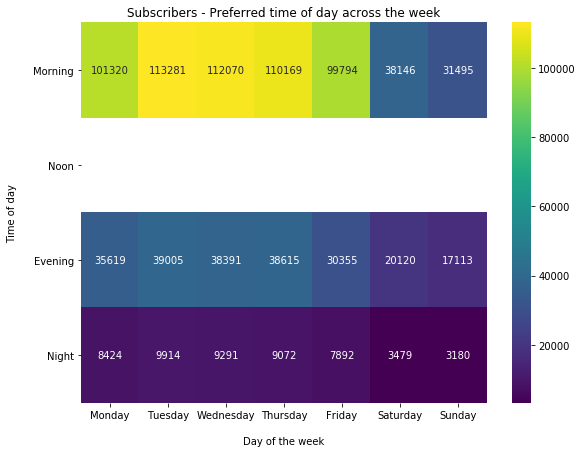

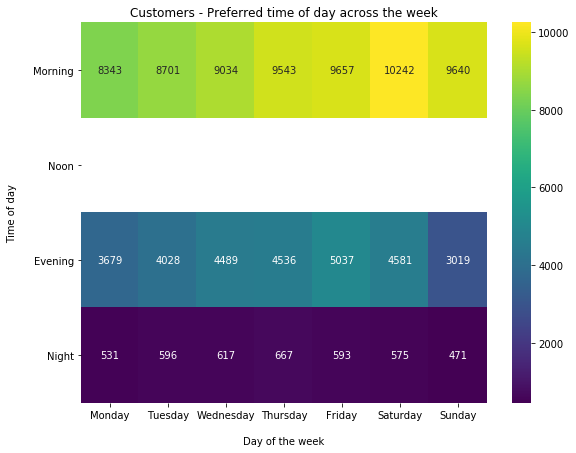

In [152]:
# Creating 2 sub-plots to compare the overall growth of the Ford GoBike service and bike_share_for_all_trip program


#first subplot for subscribers
plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
base_color = sb.color_palette()[0]
df_time_sub = df_time.query('user_type == "Subscriber"')
a = ['Morning','Noon','Evening','Night']
b = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
result = df_time_sub.pivot(index='session', columns='start_weekday', values= 'bike_id')
result = result.reindex(index=a, columns=b)
sb.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.title("Subscribers - Preferred time of day across the week", y=1.015)
plt.xlabel('Day of the week', labelpad=16)
plt.ylabel('Time of day', labelpad=16)
plt.yticks(rotation=360)
plt.show()


#second subplot for customers
plt.figure(figsize=(20,7))
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 1
base_color = sb.color_palette()[0]
df_time_cust = df_time.query('user_type == "Customer"')
a = ['Morning','Noon','Evening','Night']
b = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
result = df_time_cust.pivot(index='session', columns='start_weekday', values= 'bike_id')
result = result.reindex(index=a, columns=b)
sb.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.title("Customers - Preferred time of day across the week", y=1.015)
plt.xlabel('Day of the week', labelpad=16)
plt.ylabel('Time of day', labelpad=16)
plt.yticks(rotation=360)
plt.show()




#### Some Observations:
1. All bikes are rented out primarily in the morning
2. Majority of Subscriber rides are taken on Tue and Web
3. Whereas customers rides on Friday is less

<a id='conclusion'></a>

# 7.Conclusion
From the above exploratory analysis, it is evident that
**Persona of the user**
The user of Ford GoBike is a male between 20 and 40 years of age for their <30 min rides, primarily on weekdays

    1.The age of population who use Ford GoBike service is spread between 20 and 40 years
    2.73.3% of the population is Males
    3.We observe a bi-modal distribution for Male age 25 years and 30 years
    4.Whareas, 50% Female population is <30 years of age
    5. 83.4% of the trips are taken during weekdays
    6. And thse trips are primiarly taken on Tuesday, Wednesday and Thursday (~17% each)
    7. The service is used more during weekdays than weekends
    8. Most of the trips are taken for short durations (0-30)

**Subscriber vs. Customer**
Subscriber is a male between 25 and 35 years of age who takes multiple trips within the year, but very short trips
Customer is also a male between 20 and 40 years of age largely who takes fewer trips, but rents the service for ~2.5 times the average trip duration of a Subscriber


    1.Subscribers are heavily skewed between 25 and 35 years of age
    2.~75% of the subscribers are males
    3. Customers use the service for ~2.5time longer than Subscriber
    4. Whereas, Subscribers rent this service ~8times more than a Customer
    5. Hence, when calculating #trips x Avg trip duration, a subscriber is 3 time more valuable than customer
    6. These Subscribers rent the service on Tuesday, Wednesday and Thursday mornings
    7. Whereas customers rent the service on Friday mornings

**Overall business trend vs. Bike For All program**
The overall business and the "Bike for All" are seeing a growing trend, thereby, proving that there is confidence on this mode of transportation as an alternative
    1. Ford GoBike service is also growing overall, the subscirber base increased from 75k in Jan through ~175k in Oct
    2. The holiday season has an impact on the service and we see a dip in Nov and Dec
    3. The service is also catching up with one time users
    4. The "Bike Share" program in general is growing through the year: it started off with 6k and grew to 18k in Oct
    5. The service is also catching up with one time users.
    6. All bikes are rented out primarily in the morning
    7. Majority of Subscribers rides are taken on Tue and Web
    8. Whereas a few of our customers prefer
 
**Routes**
The most common route taken by the users is between Harry Bridges Plaza and The Embarcadero at Sansome St
    1. Harry Bridge Plaza is a hangout place in SF where one can find may folks throughout the day
    2. The Embarcadero center has an office space along with restaurants and shopping complex
    3. Both these places are less than a mile in distance
    
**Station mark**
    1.The top 10 sites contribute to ~20% of the total bike rides
    2.The remaining 321 sites contribute to 80% of the rides
    3.The most common route taken by the users is between Harry Bridges Plaza and The Embarcadero at Sansome St
    4.Harry Bridge Plaza is a hangout place in SF where one can find may folks throughout the day
    5.The Embarcadero center has an office space along with restaurants and shopping complex
    7.These 2 places are ~1 mile away
    
**Other details**
    1. All bikes are rented out primarily in the morning
    2. Majority of Subscriber rides are taken on Tue and Web
    3. Whereas customers rides on Friday is less


